# Experiment 6 - Digital Image Processing Lab
## Aim: To perform various image segmentation processes.
# Rohan Sharma - A70405218066 - BCSEL1907

In [1]:
# Importing Required Libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 6.1 Thresholding
* Thresholding is a type of image segmentation, where we change the pixels of an image to make the image easier to analyze.
* In thresholding, we convert an image from color or grayscale into a binary image, i.e., one that is simply black and white.

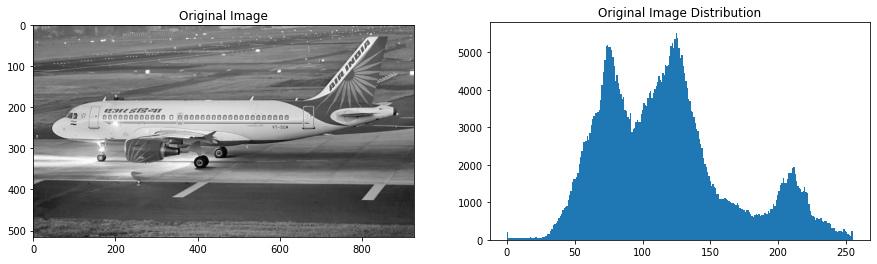

In [2]:
image = cv2.imread('Images/airindia.jpg', cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.hist(image.ravel(), bins=256)
ax2.title.set_text('Original Image Distribution')

### 6.1.1 Global Thresholding
* Global thresholding is based on the assumption that the image has a bimodal histogram.
* The object can be extracted from the background by comparing image values with a threshold value T.
* All the pixel values are thresholded according to this computed threshold value T.

In [3]:
# Computing T Values until difference in T is smaller than T0
T = (np.max(image) + np.min(image)) // 2 # Initial Estimate of T
T0 = 0

while(True):
    print(f'Thresholding Value: {T}')
    u1 = [x for x in image.ravel() if x > T ]
    u2 = [x for x in image.ravel() if x <= T ]
    T_new = ((sum(u1)/len(u1)) + (sum(u2)/len(u2))) // 2
    if abs(T_new - T) <=  T0:
        break
    else:
        T = T_new

global_thres = image > T

Thresholding Value: 127
Thresholding Value: 129.0
Thresholding Value: 131.0
Thresholding Value: 133.0
Thresholding Value: 135.0
Thresholding Value: 136.0
Thresholding Value: 137.0
Thresholding Value: 138.0
Thresholding Value: 139.0
Thresholding Value: 140.0


### 6.1.2 Adaptive Thresholding
* Adaptive thresholding is the method where the threshold value is calculated for smaller regions.
* There will be different threshold values for different regions.
* Adapative thresholding is performed using the *cv2.adaptiveThreshold* function.

In [4]:
# Taking Threshold Value as the Mean in the Neighbourhood Area
#adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
adaptive_thres = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 15)

### 6.1.3 Otsu Thresholding
* Otsu's binarization automatically calculates a threshold value from image histogram for a bimodal image.
* This computed threshold value minimizes the weighted within-class variance.
* Otsu's threshold is performed using the *cv2.threshold* function with the *cv2.THRESH_OTSU* argument.

In [5]:
#cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)
ret, otsu_thres = cv2.threshold(image, 124, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

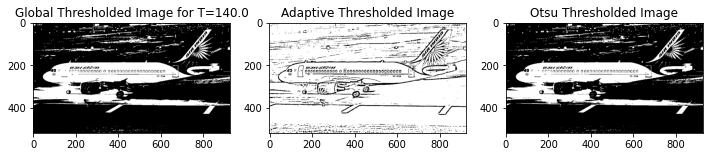

In [6]:
# Displaying Results of Thresholding Techniques
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(global_thres, cmap='gray')
ax1.title.set_text(f'Global Thresholded Image for T={T}')
ax2.imshow(adaptive_thres, cmap='gray')
ax2.title.set_text(f'Adaptive Thresholded Image')
ax3.imshow(otsu_thres, cmap='gray')
ax3.title.set_text(f'Otsu Thresholded Image')

## 6.2 Edge Detection
* Edge detection is an image processing technique for finding the boundaries of objects within images.
* It works by detecting discontinuities in brightness. Edge detection is used for image segmentation.

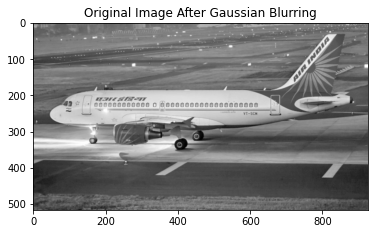

In [7]:
image = cv2.imread('Images/airindia.bmp', cv2.IMREAD_GRAYSCALE)
image = cv2.GaussianBlur(image, (3,3), 0)
plt.imshow(image, cmap='gray')
plt.title('Original Image After Gaussian Blurring')
plt.show()

### 6.2.1 Sobel Edge Detection
* Sobel edge detector is a gradient based method based on the first order derivatives.
* It calculates the first derivatives of the image separately for the X and Y axes.
* The operator uses two 3X3 kernels which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes, and one for vertical. 

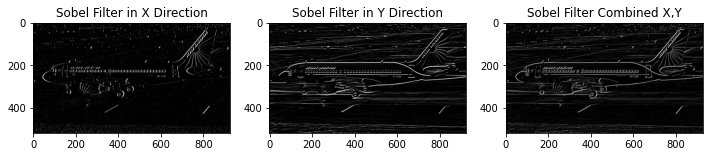

In [8]:
sobelX = cv2.Sobel(image, cv2.CV_8U, 1, 0, ksize=3).astype(np.uint64)  
sobelY = cv2.Sobel(image, cv2.CV_8U, 0, 1, ksize=3).astype(np.uint64)
sobel = np.sqrt(np.power(sobelX, 2) + np.power(sobelY, 2)).astype(np.uint64)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(sobelX, cmap='gray')
ax1.title.set_text('Sobel Filter in X Direction')
ax2.imshow(sobelY, cmap='gray')
ax2.title.set_text('Sobel Filter in Y Direction')
ax3.imshow(sobel, cmap='gray')
ax3.title.set_text('Sobel Filter Combined X,Y')

### 6.2.2 Laplacian Edge Detection
* Unlike the Sobel edge detector, the Laplacian edge detector uses only one kernel.
* It calculates second order derivatives in a single pass.
* The Laplacian filter is applied using the *cv2.Laplacian* function.

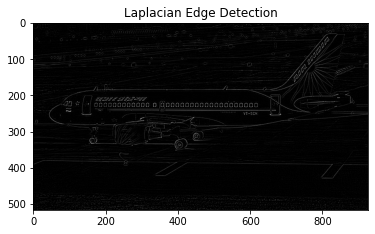

In [9]:
laplacian = cv2.Laplacian(image, cv2.CV_8U)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.show()

## 6.3 Canny Edge Detector
* The Canny edge detector is a multi-stage algorithm:
    * Noise Reduction
    * Finding Intensity Gradient of the Image
    * Non-maximum Suppression
    * Hysteresis Thresholding

* The Canny edge detector is implemented using the *cv2.Canny* function.

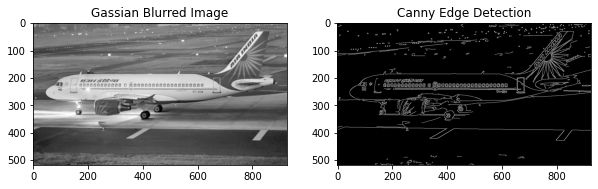

In [10]:
THRESHOLD1 = 100
THRESHOLD2 = 200

canny = cv2.Canny(image, THRESHOLD1, THRESHOLD2)

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Gassian Blurred Image')
ax2.imshow(canny, cmap='gray')
ax2.title.set_text('Canny Edge Detection')

## 6.4 Hough Line Transformation
* Hough Transform is a popular technique to detect any shape, if it can be represented in a mathematical form.
* The Hough line transformation can be implemented using the *cv2.HoughLines* function. It takes as arguments:
    * A binary image.
    * The paramater p.
    * The parameter theta for accuracy.
    * A threshold value.

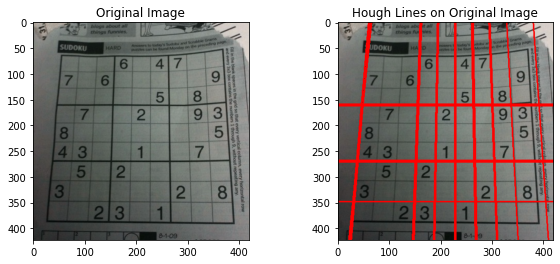

In [11]:
image = cv2.imread('Images/sudoku-original.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

for rt in lines:
    for rho, theta in rt:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(image, (x1,y1), (x2,y2), (255,0,), 2)


fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(cv2.imread('Images/sudoku-original.jpg'))
ax1.title.set_text('Original Image')
ax2.imshow(image)
ax2.title.set_text('Hough Lines on Original Image')

## Assignment - Isolated Point Detection

In [12]:
# Using Point Detection Mask on Image
image = cv2.imread('Images/turbine.jpg', cv2.IMREAD_GRAYSCALE)
point_detection_mask = np.array([[-1,-1,-1], 
                                 [-1,8,-1], 
                                 [-1,-1,-1]])
filtered = cv2.filter2D(image, -1, point_detection_mask)

In [13]:
# Thresholding
T = 0.9 * np.max(filtered) # 90% of the highest absolute pixel value of the image filtered
thresh = filtered > T

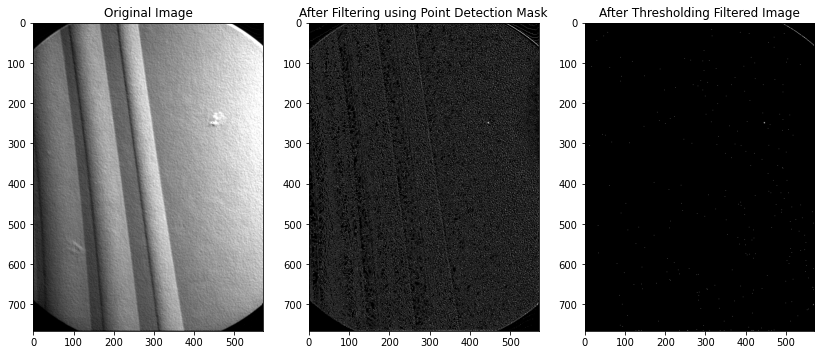

In [14]:
# Displaying Results
fig = plt.figure(figsize=(14, 12))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(filtered, cmap='gray')
ax2.title.set_text('After Filtering using Point Detection Mask')
ax3.imshow(thresh, cmap='gray')
ax3.title.set_text('After Thresholding Filtered Image')

## 6.5 Region Growing
* Region growing is a simple region-based image segmentation method.
* It is a pixel-based image segmentation method as it involves the selection of initial seed points.
* In region growing, the neighbouring pixels are analyzed to determine if they belong to the region or not.

In [22]:
# Basic Pixel Point Data Structure
class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y 

# Returns Absolute Differnce of Intensity Values Between Two Pixels
def getGrayDiff(img, currentPoint, tmpPoint):
    return abs(int(img[currentPoint.x, currentPoint.y]) - int(img[tmpPoint.x, tmpPoint.y]))

# 4-Connected or 8-Connected Points
def selectConnects(p):
    if p != 0:
        connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), Point(0, 1), Point(-1, 1), Point(-1, 0)]
    else:
        connects = [Point(0, -1), Point(1, 0), Point(0, 1), Point(-1, 0)]
    return connects

# Region Growing Method from Seed Points
def regionGrow(img, seeds, thresh, p=1):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    for seed in seeds:
        seedList.append(seed)
    label = 1
    connects = selectConnects(p)
    while (len(seedList) > 0):
        currentPoint = seedList.pop(0)
 
        seedMark[currentPoint.x, currentPoint.y] = label
        for i in range(8):
            tmpX = currentPoint.x + connects[i].x
            tmpY = currentPoint.y + connects[i].y
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue
            grayDiff = getGrayDiff(img, currentPoint, Point(tmpX, tmpY))
            if grayDiff < thresh and seedMark[tmpX, tmpY] == 0:
                seedMark[tmpX, tmpY] = label
                seedList.append(Point(tmpX, tmpY))
    return seedMark

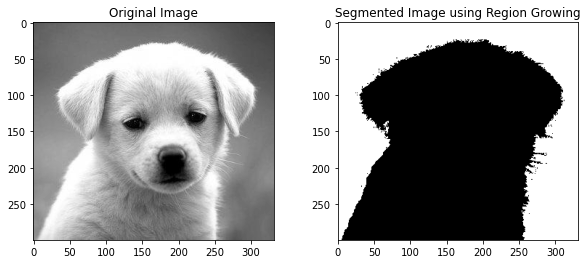

In [23]:
# Calling Region Growing Method & Displaying Results
image = cv2.imread('Images/puppy.jpg', cv2.IMREAD_GRAYSCALE)
segImage = regionGrow(image, seeds=[Point(255, 255)], thresh=5) # Single Seed Point, Threshold=5

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(segImage, cmap='gray')
ax2.title.set_text('Segmented Image using Region Growing')

## 6.6 Clustering using KMeans Algorithm
* K Means is an unsupervised clustering algorithm which works on unlabelled datapoints.
* It is used to identify different classes or clusters in the given data based on how similar the data is.
* This algorithm can also segment objects in images, identifying data points that are similar into a cluster.
* On increasing the value of k, the image becomes more distinct as the K-means algorithm classifies more classes of colors.

In [17]:
# Reading Coloured Image into RGB Format
image = cv2.imread('Images/peppers.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
print('Original Image Shape:', image.shape)
# Converting into a 2D Array
pixels = np.float32(image.reshape((-1,3)))
print('Pixel Dataset Shape:', pixels.shape)

Original Image Shape: (512, 512, 3)
Pixel Dataset Shape: (262144, 3)


In [18]:
# Criteria for Iteration Termination
# Algorithm stops after 0.85 accuracy is reached, 100 max iterations are performed 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# K-Values for Clusters
K1 = 3
K2 = 5
_, labels1, centers1 = cv2.kmeans(pixels, K1, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
_, labels2, centers2 = cv2.kmeans(pixels, K2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  
# Mapping Centers to Labels
centers1 = np.uint8(centers1) 
segmented_data1 = centers1[labels1.flatten()] 
centers2 = np.uint8(centers2)
segmented_data2 = centers2[labels2.flatten()]
  
# Reshaping Segmented Data into Image Dimensions
segmented_image1 = segmented_data1.reshape((image.shape)) 
segmented_image2 = segmented_data2.reshape((image.shape))

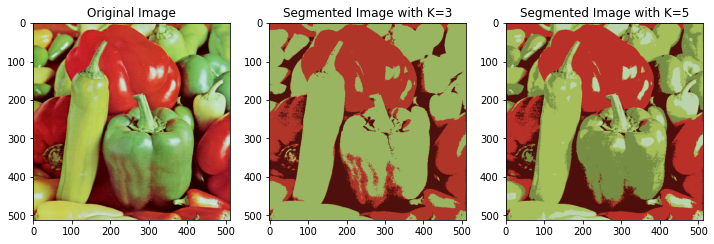

In [19]:
# Displaying Results
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(image)
ax1.title.set_text('Original Image')
ax2.imshow(segmented_image1)
ax2.title.set_text(f'Segmented Image with K={K1}')
ax3.imshow(segmented_image2)
ax3.title.set_text(f'Segmented Image with K={K2}')